In [1]:
import sys
print (sys.path)

['D:\\work\\models\\mount\\literate-eureka', 'C:\\Users\\Chanchala\\Miniconda3\\envs\\tf2\\python37.zip', 'C:\\Users\\Chanchala\\Miniconda3\\envs\\tf2\\DLLs', 'C:\\Users\\Chanchala\\Miniconda3\\envs\\tf2\\lib', 'C:\\Users\\Chanchala\\Miniconda3\\envs\\tf2', '', 'C:\\Users\\Chanchala\\Miniconda3\\envs\\tf2\\lib\\site-packages', 'C:\\Users\\Chanchala\\Miniconda3\\envs\\tf2\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Chanchala\\.ipython']


In [2]:
import tensorflow as tf
print (tf.__version__)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

1.13.1


In [3]:
import matplotlib.pyplot as plt

image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

8


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.2119 - acc: 0.9360
Epoch 2/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0864 - acc: 0.9737
Epoch 3/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0614 - acc: 0.9811
Epoch 4/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0477 - acc: 0.9852
Epoch 5/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0363 - acc: 0.9879
Epoch 6/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.0281 - acc: 0.9898
Epoch 7/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.0265 - acc: 0.9911
Epoch 8/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0222 - acc: 0.9923
Epoch 9/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.0193 - acc: 0.9939
Epoch 10/10
60000/60000 [=========

In [8]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 1s 116us/step


[0.05828814650792046, 0.9856]

9


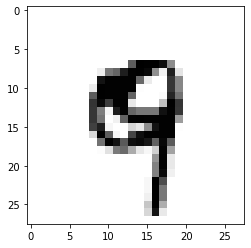

In [9]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
#from keras.models import save_model,load_model
#import keras
#model.save_weights("my_mnist4_weights.h5")
#model.save("my_mnist_full.h5")

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


In [13]:
#from show_graph import show_graph
from keras import backend as K
import tensorflow as tf
sess = K.get_session()
graph_def = sess.graph.as_graph_def()
# graph_def
#show_graph(graph_def)

In [14]:
print(model.outputs)

[<tf.Tensor 'dense_2/Softmax:0' shape=(?, 10) dtype=float32>]


In [15]:

print(model.inputs)

[<tf.Tensor 'conv2d_1_input:0' shape=(?, 28, 28, 1) dtype=float32>]


In [16]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        # Graph -> GraphDef ProtoBuf
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph

In [17]:

from keras import backend as K
import tensorflow as tf

frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])

Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
INFO:tensorflow:Froze 29 variables.
INFO:tensorflow:Converted 29 variables to const ops.


In [18]:

tf.train.write_graph(frozen_graph, "model", "tf_model.pb", as_text=False)

'model\\tf_model.pb'

In [19]:
import tensorflow as tf
import os
import sys
from tensorflow.python.platform import gfile

In [20]:

sess=tf.InteractiveSession()

In [21]:

f = gfile.FastGFile("./model/tf_model.pb", 'rb')
graph_def = tf.GraphDef()
# Parses a serialized binary message into the current message.
graph_def.ParseFromString(f.read())
f.close()

Instructions for updating:
Use tf.gfile.GFile.


In [22]:
sess.graph.as_default()
# Import a serialized TensorFlow `GraphDef` protocol buffer
# and place into the current default `Graph`.
tf.import_graph_def(graph_def)

In [23]:
softmax_tensor = sess.graph.get_tensor_by_name('import/dense_2/Softmax:0')

In [24]:
from keras.datasets import mnist
from keras import backend as K


# input image dimensions
img_rows, img_cols = 28, 28

(_, _), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_test = x_test.astype('float32')
x_test /= 255
print('x_test shape:', x_test.shape)
print(x_test.shape[0], 'test samples')

x_test shape: (10000, 28, 28, 1)
10000 test samples


In [25]:
predictions = sess.run(softmax_tensor, {'import/conv2d_1_input:0': x_test[:20]})

In [26]:
[p.argmax() for p in predictions]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]

In [27]:
for i, item in enumerate(graph_def.node):
    print(i, item.op, item.name, item.input)

0 Placeholder conv2d_1_input []
1 Const conv2d_1/kernel []
2 Identity conv2d_1/kernel/read ['conv2d_1/kernel']
3 Const conv2d_1/bias []
4 Identity conv2d_1/bias/read ['conv2d_1/bias']
5 Conv2D conv2d_1/convolution ['conv2d_1_input', 'conv2d_1/kernel/read']
6 BiasAdd conv2d_1/BiasAdd ['conv2d_1/convolution', 'conv2d_1/bias/read']
7 MaxPool max_pooling2d_1/MaxPool ['conv2d_1/BiasAdd']
8 Shape flatten_1/Shape ['max_pooling2d_1/MaxPool']
9 Const flatten_1/strided_slice/stack []
10 Const flatten_1/strided_slice/stack_1 []
11 Const flatten_1/strided_slice/stack_2 []
12 StridedSlice flatten_1/strided_slice ['flatten_1/Shape', 'flatten_1/strided_slice/stack', 'flatten_1/strided_slice/stack_1', 'flatten_1/strided_slice/stack_2']
13 Const flatten_1/Const []
14 Prod flatten_1/Prod ['flatten_1/strided_slice', 'flatten_1/Const']
15 Const flatten_1/stack/0 []
16 Pack flatten_1/stack ['flatten_1/stack/0', 'flatten_1/Prod']
17 Reshape flatten_1/Reshape ['max_pooling2d_1/MaxPool', 'flatten_1/stack']
18

In [44]:
new_model = load_model("my_mnist2.h5")


In [45]:
x_test[image_index]


array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [46]:
x_test[image_index].reshape(1, 28, 28, 1)

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         

In [36]:
from PIL import Image

In [37]:
image = Image.open('input_dir\\img_6.png')

In [38]:
image.show()

In [39]:
import numpy as np

In [40]:
np.array(image).astype('float32').reshape(1,28,28,1)

array([[[[  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [

In [43]:
pred = new_model.predict(np.array(image).astype('float32').reshape(1,28,28,1))

In [41]:
test_predictions = sess.run(softmax_tensor, {'import/conv2d_1_input:0': np.array(image).astype('float32').reshape(1,28,28,1)})

In [42]:
print(test_predictions.argmax())

4


In [53]:
print(pred.argmax())

0
